## Notebook to Simulate MIRI Observations based on NEMESIS Outputs

When launching the notebook, make sure in the right Anaconda environment. i.e. type

<code> source activate mirisim </code> 

in the terminal before starting the notebook.  This is based on contributions from A. Glasse, N. Rowe-Gurney, and the MIRISim walkthrough.

Mirisim can be run via notebooks or directly as a callable python package. 

L.N. Fletcher (2021)

### Open Questions:
* Am I correctly mapping the NEMESIS cubes to detector, disperser, MRS sub-band?
* Are the expected units uJy/arcsec^2?
* I am providing only a single MRS sub-band to the simulator, and yet both halves of the detector frame seem to have contents (e.g., CH1/2 for 'SW' detector; CH4/3 for 'LW' detector) - why?
* Background is not yet included - what are the units?

In [1]:
# Set up MIRISIM and import useful tools:
from mirisim import MiriSimulation

# import the configuration file parsers so they can be written to file
from mirisim.config_parser import SimConfig, SceneConfig, SimulatorConfig
#from mirisim.skysim import wrap_pysynphot as wS

# import scene component generators
from mirisim.skysim import Background

#other tools to be used
import numpy as np
import glob                 # glob is used to find the output directory
import os                   # for listing directory contents
from astropy.io import fits # for reading FITS file contents

import matplotlib.pyplot as plt    # to display images
from matplotlib import colors,cm
%matplotlib inline   

import astropy.units as u


## 1) Read & Modify the Uranus Scene:

The direct cubes calculated by NEMESIS are subdivided into 12 seperate channels, each with an associated wavelength grid that doesn't appear to be used right now.  In the block that follows, the header of the FITS file is updated to be recognised by the MIRISim code.

#### Mapping Simulation Cube to MRS Parameters

Detector = Specify Dectector (SW = channels 1,2, LW= channels 3,4)
Channel = channels 1-4 (also called MRS subbands)
Disperser = Specify disperser to use (SHORT/MEDIUM/LONG, aka A/B/C)

1. SW 1 SHORT/A
1. SW 1 MEDIUM/B
1. SW 1 LONG/C
1. SW 2 SHORT/A
1. SW 2 MEDIUM/B
1. SW 2 LONG/C
1. LW 3 SHORT/A
1. LW 3 MEDIUM/B
1. LW 3 LONG/C
1. LW 4 SHORT/A
1. LW 4 MEDIUM/B
1. LW 4 LONG/C




In [2]:
# Mapping the Cube to the MRS sub-band, disperser, and detector:
ichan=7

if ichan==1:
    ConfigPath = 'MRS_1SHORT'
    disperser = 'SHORT'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan1_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan1_wave.fits"
if ichan==2:
    ConfigPath = 'MRS_1MEDIUM'
    disperser = 'MEDIUM'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan2_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan2_wave.fits"
if ichan==3:
    ConfigPath = 'MRS_1LONG'
    disperser = 'LONG'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan3_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan3_wave.fits"
if ichan==4:
    ConfigPath = 'MRS_2SHORT'
    disperser = 'SHORT'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan4_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan4_wave.fits"
if ichan==5:
    ConfigPath = 'MRS_2MEDIUM'
    disperser = 'MEDIUM'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan5_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan5_wave.fits"
if ichan==6:
    ConfigPath = 'MRS_2LONG'
    disperser = 'LONG'
    detector = 'SW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan6_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan6_wave.fits"
if ichan==7:
    ConfigPath = 'MRS_3SHORT'
    disperser = 'SHORT'
    detector = 'LW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan7_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan7_wave.fits"
if ichan==8:
    ConfigPath = 'MRS_3MEDIUM'
    disperser = 'MEDIUM'
    detector = 'LW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan8_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan8_wave.fits"
if ichan==9:
    ConfigPath = 'MRS_3LONG'
    disperser = 'LONG'
    detector = 'LW'    
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan9_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan9_wave.fits"
if ichan==10:
    ConfigPath = 'MRS_4SHORT'
    disperser = 'SHORT'
    detector = 'LW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan10_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan10_wave.fits"
if ichan==11:
    ConfigPath = 'MRS_4MEDIUM'
    disperser = 'MEDIUM'
    detector = 'LW'
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan11_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan11_wave.fits"
if ichan==12:
    ConfigPath = 'MRS_4LONG'
    disperser = 'LONG'
    detector = 'LW'    
    u_raw_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan12_radJy.fits"
    wav_fits = "/Users/lnf2/Data/JWST-MIRI/uranusMRS_chan12_wave.fits"
    
print("Channel:",ichan)
print("Disperser:",disperser)
print("Optical Path:",ConfigPath)
print("Detector",detector)
    
hdu_list = fits.open(u_raw_fits)
hdu = hdu_list[0]


whdu_list = fits.open(wav_fits)
whdu = whdu_list[0]

wavegrid=whdu.data

vmin=np.min(wavegrid)
vmax=np.max(wavegrid)
nwav=len(wavegrid)
dwave=(vmax-vmin)/nwav

print("Wavelengths:",vmin,vmax,nwav)
print("Dispersion:",dwave)

crpix = (1, 1, 1)
crval = (0., 0., vmin)
dpix = 0.11                 # Pixel size in arcsec
#dwave = 0.00073             # micron (bw / 1300 ~
cdelt = (dpix, dpix, dwave)

hdu.header['CRVAL1'] = crval[0]
hdu.header['CRPIX1'] = crpix[0]
hdu.header['CDELT1'] = cdelt[0]
hdu.header['CUNIT1'] = u.arcsec.to_string()
hdu.header['CTYPE1'] = 'RA---TAN'

hdu.header['CRVAL2'] = crval[1]
hdu.header['CRPIX2'] = crpix[1]
hdu.header['CDELT2'] = cdelt[1]
hdu.header['CUNIT2'] = u.arcsec.to_string()
hdu.header['CTYPE2'] = 'DEC--TAN'

hdu.header['CRVAL3'] = crval[2]
hdu.header['CRPIX3'] = crpix[2]
hdu.header['CDELT3'] = cdelt[2]
hdu.header['CUNIT3'] = u.micron.to_string()
hdu.header['CTYPE3'] = 'WAVE    '

hdu.header['UNITS'] = 'uJy / arcsec2'  #u.microjansky.to_string()

hdu.data = np.multiply(hdu.data, 1.0e6)  # NEMESIS data in Jy/arcsec^2, multiply to get microJy/arcsec^2

run_file_name = 'run_scene.fits'
if os.path.isfile(run_file_name):
    os.remove(run_file_name)
hdu.writeto(run_file_name)

print("Modified FITS file created")


Channel: 7
Disperser: SHORT
Optical Path: MRS_3SHORT
Detector LW
Wavelengths: 11.44 13.6398 974
Dispersion: 0.002258522065023622
Modified FITS file created


In [3]:
### create a low level background for the scene
bg = Background(level='low', gradient = 5., pa = 15.)  # Gradient=0 == contant background)

# NOTE!  bg is currently unused, and needs to be added to the scene or FITS image.



2021-01-06 08:45:29,943 - INFO - Initializing Background


# 2) Initialise the Simulation Parameters

This is where the parameters for the MRS simulation get set. Note that for internal consistency in MIRISim, all settings (including those not used in the MRS simulation here) must be set. Those not being used in this simulation are labelled with <code> NOT USED HERE </code> in the comments of each line

MIRISim then needs a configuration file to run.
Questions:
* Should we change ConfigPath for each subband?  Yes, doesn't make sense otherwise.
* Do we need to change the imager filter when using the MRS?  No, don't think it's used.

In [4]:
sim_config = SimConfig.makeSim(
    name = 'Uranus.test',           # name given to simulation,
    scene = 'uranus_scene',         # name of scene file to input,
    rel_obsdate = 0.0,              # relative observation date (0 = launch, 1 = end of 5 yrs),
    POP = 'MRS',                    # Component on which to center (Imager or MRS),
    ConfigPath = ConfigPath,      # Configure the Optical path (MRS sub-band)
    Dither = False,                 # Dither  - use false for test case
    StartInd = 1,                   # Start index for dither pattern
    NDither = 2,                    # Number of dither positions (12)
    DitherPat = 'mrs_recommended_dither.dat', # dither pattern to use   - If using REULEAUX need to update,
    disperser = disperser,        # Which disperser to use (SHORT/MEDIUM/LONG)
    detector = detector,            # Specify Channel (SW = channels 1,2, LW= channels 3,4)
    mrs_mode = 'FAST',          # MRS read mode (default is SLOW. ~ 24s)
    mrs_exposures = 2,          # MRS number of exposures
    mrs_integrations = 10,      # MRS number of integrations
    mrs_frames = 10,            # MRS number of groups (for MIRI, # Groups = # Frames)
    ima_exposures = 1,          # IMA number of exposures,
    ima_integrations = 10,      # IMA number of integrations (5)",
    ima_frames = 10,            # IMA number of groups (for MIRI, # Groups = # Frames),
    ima_mode = 'FAST',          # IMA read mode (default is FAST ~ 2.3 s),
    filter = 'F770W',           # IMA Filter to use,
    readDetect = 'FULL'         # Portion of detector to read out,
)

simulator_config = SimulatorConfig.from_default()
scene_config = SceneConfig('uranus_scene.ini')
# Export the simulation setup to a file.
sim_config.write('MRS_simulation.ini')


print("Simulation configuration complete.")

2021-01-06 08:45:34,578 - INFO - Using scene configuration: uranus_scene.ini


MRS_simulation.ini exists, overwrite (y/[n])?y
Simulation configuration complete.


# 3) Run the simulation

Now that the scene and the setup of the simulation have been set, we can run the simulation.

the last step is to setup the defaults for internal things like CDPs.
Outputs to unique directory format: YYYYMMDD_HHMMSS_mirisim

In [5]:

sim = MiriSimulation(sim_config, scene_config, simulator_config)

print("Running simulation:")
sim.run()


2021-01-06 08:45:41,316 - INFO - MIRISim version: 2.3.0
2021-01-06 08:45:41,317 - INFO - MIRI Simulation started.
2021-01-06 08:45:41,318 - INFO - Output will be saved to: 20210106_084541_mirisim
2021-01-06 08:45:41,319 - INFO - Storing configs in output directory.


Running simulation:


2021-01-06 08:45:42,976 - INFO - Reading cosmic ray properties from parameter file /opt/anaconda3/envs/mirisim/lib/python3.7/site-packages/miri/simulators/scasim/cosmic_ray_properties.py
2021-01-06 08:45:42,998 - INFO - Reading detector properties from parameter file /opt/anaconda3/envs/mirisim/lib/python3.7/site-packages/miri/simulators/scasim/detector_properties.py
2021-01-06 08:45:43,134 - INFO - Storing dither pattern in output directory.
2021-01-06 08:45:43,136 - WARNING - Environment variable CDP_DIR is not set. Will look up / store CDP files at ./CDP
2021-01-06 08:45:43,136 - INFO - Setting up simulated Observation, with following settings:
2021-01-06 08:45:43,137 - INFO - Configuration Path: MRS_3SHORT
2021-01-06 08:45:43,138 - INFO - Primary optical path: MRS
2021-01-06 08:45:43,139 - INFO - MRS detector: LW
2021-01-06 08:45:43,139 - INFO - MRS band: SHORT
2021-01-06 08:45:43,140 - INFO - MRS detector readout mode: FAST
2021-01-06 08:45:43,140 - INFO - MRS detector # exposures

{'RA': [-3.3, 3.3000000000000003], 'DEC': [-3.3, 3.3000000000000003], 'WAV': [11.437741058318277, 13.635283027586262]}


2021-01-06 08:46:08,637 - INFO - 3D downsampling took 2.4 seconds
2021-01-06 08:46:08,638 - INFO - Final helper interpolation...
2021-01-06 08:46:08,718 - INFO - All done
2021-01-06 08:46:08,742 - INFO - Reading 'PSF' model from './CDP/MIRI_FM_MIRIFULONG_4SHORT_PSF_07.02.00.fits'
2021-01-06 08:46:19,677 - INFO - Wrote skycube: 20210106_084541_mirisim/skycubes/skycube_seq1_4SHORT.fits
2021-01-06 08:46:19,678 - INFO - Simulating detector illumination for MRS exposures for pointing 1
2021-01-06 08:46:19,683 - INFO - Starting pySpecSimMiri
2021-01-06 08:46:19,706 - INFO - Simulating setup file /opt/anaconda3/envs/mirisim/lib/python3.7/site-packages/pySpecSim/MIRI/MiriSetupData.py
2021-01-06 08:46:19,707 - INFO - Instrument setup starting.
2021-01-06 08:46:19,708 - INFO - Detector setup starting.
2021-01-06 08:46:19,709 - INFO - Could not find value for numBlind Columns, assuming 4.
2021-01-06 08:46:19,711 - INFO - MRS light path simulation starting.
2021-01-06 08:46:19,713 - INFO - Simulat

2021-01-06 08:57:01,392 - INFO - Simulating 10 groups for integration 2.
2021-01-06 08:57:03,289 - INFO - Simulating 10 groups for integration 3.
2021-01-06 08:57:05,186 - INFO - Simulating 10 groups for integration 4.
2021-01-06 08:57:07,087 - INFO - Simulating 10 groups for integration 5.
2021-01-06 08:57:08,981 - INFO - Simulating 10 groups for integration 6.
2021-01-06 08:57:10,842 - INFO - Simulating 10 groups for integration 7.
2021-01-06 08:57:12,705 - INFO - Simulating 10 groups for integration 8.
2021-01-06 08:57:14,591 - INFO - Simulating 10 groups for integration 9.
2021-01-06 08:57:16,473 - INFO - Simulating 10 groups for integration 10.
2021-01-06 08:57:18,346 - INFO - Adding the DARK calibration from ./CDP/MIRI_FM_MIRIFULONG_FAST_34_DARK_06.01.00.fits
2021-01-06 08:57:19,431 - INFO - Correcting nonlinearity from MIRI_FM_MIRIFULONG_34SHORT_LINEARITY_06.02.00.fits
2021-01-06 08:57:22,885 - INFO - Output subarray undefined or FULL. SUBSTRT=(1,1), SUBSIZE=(1032,1024)
2021-01-

# 4) Examine some of the results

Now that the MIRISim simulation has completed, lets examine the results. 


The first thing to note is that the outputs are placed in a date-labelled directory taking the form  <code> YYYYMMDD_hhmmss_mirisim</code>.  The name of the output directory is given in the last line of the MIRISim log above.  Because the output directory is date-labelled, we can quantify which was the most recent run of MIRISim, and find its output directory using <code>glob.glob</code>

In [6]:
outputdir = sorted(glob.glob('*_*_mirisim'),key=os.path.getmtime)[-1]    #[-1] takes the last entry found

outputDirContents = os.listdir(outputdir)

directories = [name for name in outputDirContents if os.path.isdir(os.path.join(outputdir,name))]
files = [name for name in outputDirContents if not os.path.isdir(os.path.join(outputdir,name))]

print('The subdirectories in the outputdirectory are:\n{}'.format(directories))
print('The files in the outputdirectory are:\n{}'.format(files))

The subdirectories in the outputdirectory are:
['det_images', 'skycubes', 'illum_models']
The files in the outputdirectory are:
['simulator.ini', 'scene.ini', 'mrs_recommended_dither.dat', 'simulation.ini', 'mirisim.log']


The files contain the log which was also output to the terminal (<code> mirisim.log</code>) and copies of the .ini files used (or created from python inputs) to create the simulation. These versions of the .ini files can be used to re-create the run of the simulation

The directories contain various outputs of MIRISim:

* **<code> skycubes </code>** houses a 3D representation of the input scene to the MRS simulation (skycubes are not generated for imager or LRS simulations). This cube has not been processed by MIRISim, it is simply a gridded (spatially and spectrally) version of the input scene.  
* **<code> illum_models </code>** houses FITS images of the illuminations sent to the detector (sent to SCAsim - the simulator of the Sensor Chip Assembly).  This should have the same format as the detector image, but without all of the detector effects and noise. There are FITS files produced for each exposure and dither position
* **<code> det_images </code>** houses FITS images of the final outputs of MIRISim. These detector images have all of the detector effects and noise incorporated. The number of detector images should be the same as the number of illumination models. 

The headers of the detector images are formatted for ingest into the JWST pipeline. 

Below is a small code snippet used to draw the images.  it needs to be run, but doesn't produce any output directly (it's called later to show the output images)

In [7]:
def show_outputs(MIRISim_outputdir,output_type):
    '''
    plot the specified channel of the MIRISim outputs
    :param MIRISim_outputdir:  
        name of the date-labelled dir. holding the MIRISIM outputs
    :param output_type: 
        type of output to process 
        (e.g. illum_models, det_images or skycubes)
    '''
    
    infits = glob.glob('{}/{}/*.fits'.format(MIRISim_outputdir,output_type))[0]
    
    hdulist = fits.open(infits)
    
    if output_type.lower() == 'skycubes': 
        hdu_index = 0
        datashape = hdulist[hdu_index].data.shape
        central_chan = datashape[0]/2
        plt.imshow(hdulist[hdu_index].data[central_chan,:,:],
           origin = 'lower', interpolation = 'nearest',cmap = cm.viridis)
        plt.title('channel {} of {}'.format(central_chan,infits.split('/')[-1]))
        plt.xlabel(hdulist[hdu_index].header['ctype1'])
        plt.ylabel(hdulist[hdu_index].header['ctype2'])
    else:
        hdu_index = 1
        if len(hdulist[hdu_index].data.shape) > 2:
            integ,frames,nx,ny = hdulist[hdu_index].data.shape
            image = hdulist[hdu_index].data[integ-1,frames-1,:,:]
        else:
            image = hdulist[hdu_index].data
            
        
        plt.imshow(image, origin = 'lower',cmap = cm.viridis,interpolation='nearest')
        plt.title('{}'.format(infits.split('/')[-1]))
        plt.xlabel('Along Slice Direction')
        plt.ylabel('Wavelength Direction')


    plt.colorbar()
    plt.savefig('MRS_{}.png'.format(output_type))


### Viewing a slice of the skycube

Below, we show an image of the central channel of one of the skycubes generated by MIRISim

In [8]:
show_outputs(outputdir,'skycubes')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Viewing an illumination model

Below shows an example of an output illumination model

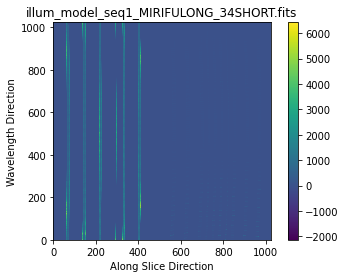

In [9]:
show_outputs(outputdir,'illum_models')

### Viewing the final detector image

The detector images are the final output of MIRISim, and have data structures and formatting consistent with what will come from MIRI itself. The data format is JWST pipeline ready.  Below an example image of the last frame of the last integration is shown. The units are <code>DN</code>.

Additionally, below the FITS header information for the SCIENCE extension is listed.

This is the "Level 1" data.

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                 1032                                                  
NAXIS2  =                 1024                                                  
NAXIS3  =                   10                                                  
NAXIS4  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
                                                                                
        Information about the coordinates in the file                           
                            

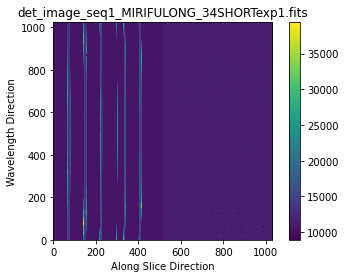

In [10]:
show_outputs(outputdir,'det_images')

infits = glob.glob('{}/det_images/*.fits'.format(outputdir))[0]
hdulist = fits.open(infits)
hdulist[1].header

### Next Steps
* Run through MRS pipeline to test output products.
* Patrick Kavanagh has provided some excellent notebooks at, https://github.com/PaddyKavanagh
* For this dataset, Alistair adapted build7.2.1/MRS_pipeline.ipynb which runs all pipeline steps up to cube building and spectrum extraction.